# Data Collection

In [1]:
import pandas as pd
df=pd.read_csv("lung cancer data.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,YES,NO,NO,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO,YES
1,M,74,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES
2,F,59,YES,YES,YES,NO,YES,NO,YES,NO,YES,NO,NO,YES,NO,NO
3,M,63,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES,YES,NO,NO,NO
4,F,63,YES,NO,YES,YES,YES,YES,YES,NO,YES,NO,NO,YES,YES,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,YES,YES,YES,NO,NO,NO,YES,YES,NO,NO,NO,NO,YES,YES
305,M,70,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO,NO,YES,NO,YES
306,M,58,NO,YES,YES,YES,YES,YES,NO,NO,NO,NO,YES,YES,NO,YES
307,M,67,NO,YES,NO,YES,YES,NO,NO,YES,NO,NO,NO,YES,NO,YES


In [2]:
df.value_counts("LUNG_CANCER")

LUNG_CANCER
YES    270
NO      39
dtype: int64

# Data preprocessing

In [3]:
x=df.iloc[:,0:15].values
x

array([['M', 69, 'YES', ..., 'NO', 'NO', 'NO'],
       ['M', 74, 'NO', ..., 'NO', 'NO', 'NO'],
       ['F', 59, 'YES', ..., 'NO', 'YES', 'NO'],
       ...,
       ['M', 58, 'NO', ..., 'YES', 'YES', 'NO'],
       ['M', 67, 'NO', ..., 'NO', 'YES', 'NO'],
       ['M', 62, 'YES', ..., 'YES', 'NO', 'YES']], dtype=object)

In [4]:
y=df.iloc[:,15].values
y

array(['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YE

In [5]:
x.shape,y.shape

((309, 15), (309,))

In [6]:
import numpy as np
import seaborn as sns

# Assuming y is a pandas Series or DataFrame with a single column
# If y is a numpy array, convert it to a DataFrame first
if isinstance(y, np.ndarray):
    y_vis = pd.DataFrame(y, columns=['LUNG_CANCER'])
    
# Check the distribution of the target variable
label_counts = y_vis['LUNG_CANCER'].value_counts()
print(label_counts)

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


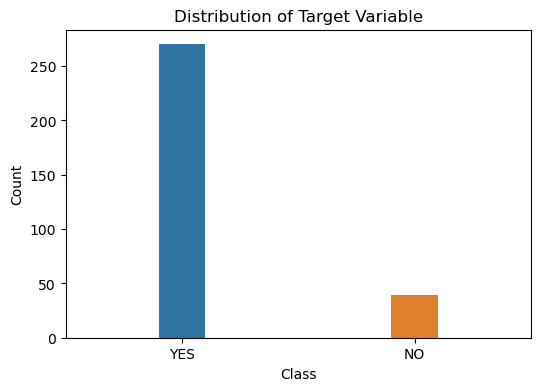

In [7]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=y_vis,width=0.2)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

en=LabelEncoder()
x[:,0]=en.fit_transform(x[:,0])
for i in range(2,15):
    x[:,i]=en.fit_transform(x[:,i])
x

array([[1, 69, 1, ..., 0, 0, 0],
       [1, 74, 0, ..., 0, 0, 0],
       [0, 59, 1, ..., 0, 1, 0],
       ...,
       [1, 58, 0, ..., 1, 1, 0],
       [1, 67, 0, ..., 0, 1, 0],
       [1, 62, 1, ..., 1, 0, 1]], dtype=object)

In [9]:
y=en.fit_transform(y)
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[1.        , 0.72727273, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.8030303 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57575758, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.56060606, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.6969697 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.62121212, 1.        , ..., 1.        , 0.        ,
        1.        ]])

# Data Balancing using SMOTE

In [11]:
#data balancing using SMOTE ALGORITHM

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
x_new,y_new = smote.fit_resample(x,y)

#counting no. of values in y
(unique,counts) = np.unique(y_new, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)

{0: 270, 1: 270}


In [12]:
y_new

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
if isinstance(y, np.ndarray):
    y_vis = pd.DataFrame(y_new, columns=['LUNG_CANCER'])  

# Check the distribution of the target variable
label_counts = y_vis['LUNG_CANCER'].value_counts()
print(label_counts)

1    270
0    270
Name: LUNG_CANCER, dtype: int64


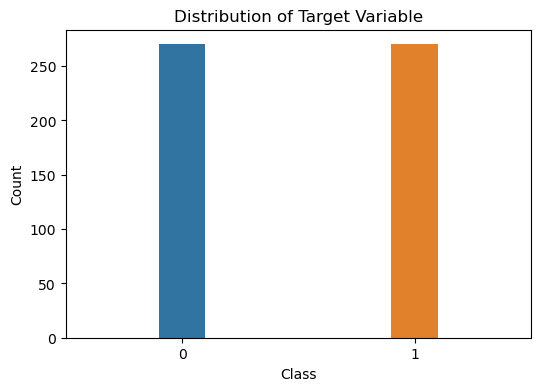

In [14]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=y_vis,width=0.2)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Splitting data

In [15]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.1,random_state=0)

In [16]:
x_train.shape,y_train.shape

((486, 15), (486,))

In [17]:
x_test.shape,y_test.shape

((54, 15), (54,))

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(weights='distance')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [19]:
y_pred=knn_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [20]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [21]:
#for user input
x_user=np.array([1,55,0,0,1,1,0,0,0,1,1,1,0,0,0])  #input is in encoded format

x_user = x_user.reshape(1,-1)  #reshaping 1d array to 2d array
x_user=sc.transform(x_user)  #scaling the input

y_pred_user=knn_model.predict(x_user)
y_pred_user

array([0])

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[29,  0],
       [ 1, 24]], dtype=int64)

In [23]:
acc=[]
model_name=[]

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(y_test,y_pred))
acc_knn=accuracy_score(y_test,y_pred)

from sklearn.metrics import precision_score
print("Precision=",precision_score(y_test,y_pred))

from sklearn.metrics import recall_score
print("Recall=",recall_score(y_test,y_pred))

from sklearn.metrics import f1_score
print("F1-Score=",f1_score(y_test,y_pred))

acc.append(acc_knn)
model_name.append("KNN")

Accuracy= 0.9814814814814815
Precision= 1.0
Recall= 0.96
F1-Score= 0.9795918367346939


In [25]:
acc,model_name

([0.9814814814814815], ['KNN'])

In [26]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_proba = knn_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.9779310344827585


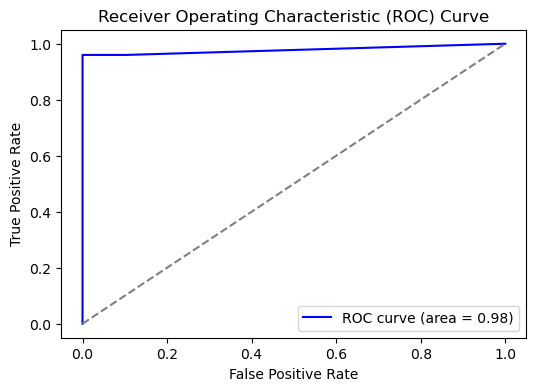

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [29]:
y_pred2=nb_model.predict(x_test)
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [30]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [31]:
#for user input
x_user2=np.array([1,55,0,0,1,1,0,0,0,1,1,1,0,0,0])  #input is in encoded format

x_user2 = x_user2.reshape(1,-1)  #reshaping 1d array to 2d array
x_user2=sc.transform(x_user2)  #scaling the input

y_pred_user2=nb_model.predict(x_user2)
y_pred_user2

array([1])

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
cm

array([[28,  1],
       [ 1, 24]], dtype=int64)

In [33]:
print("Accuracy=",accuracy_score(y_test,y_pred2))
acc_nb=accuracy_score(y_test,y_pred2)

print("Precision=",precision_score(y_test,y_pred2))

print("Recall=",recall_score(y_test,y_pred2))

print("F1-Score=",f1_score(y_test,y_pred2))

acc.append(acc_nb)
model_name.append("NB")

Accuracy= 0.9629629629629629
Precision= 0.96
Recall= 0.96
F1-Score= 0.96


In [34]:
acc,model_name

([0.9814814814814815, 0.9629629629629629], ['KNN', 'NB'])

In [35]:
y_pred_proba = nb_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.9820689655172414


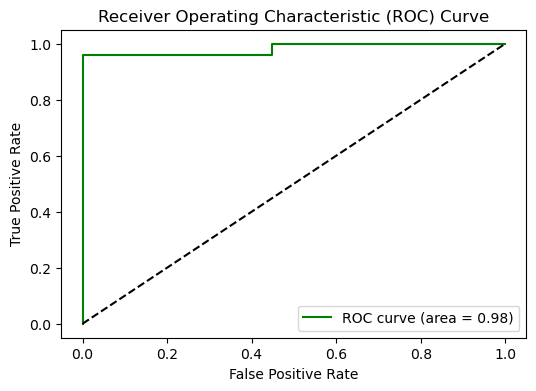

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion='gini') #criterion='entropy' teo same accuracy diche
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred3=dt_model.predict(x_test)
y_pred3

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [39]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [40]:
#for user input
x_user3=np.array([1,55,0,0,1,1,0,0,0,1,1,1,0,0,0])  #input is in encoded format

x_user3 = x_user3.reshape(1,-1)  #reshaping 1d array to 2d array
x_user3=sc.transform(x_user3)  #scaling the input

y_pred_user3=dt_model.predict(x_user3)
y_pred_user3

array([1])

In [41]:
cm=confusion_matrix(y_test,y_pred3)
cm

array([[28,  1],
       [ 1, 24]], dtype=int64)

In [42]:
print("Accuracy=",accuracy_score(y_test,y_pred3))
acc_dt=accuracy_score(y_test,y_pred3)

print("Precision=",precision_score(y_test,y_pred3))

print("Recall=",recall_score(y_test,y_pred3))

print("F1-Score=",f1_score(y_test,y_pred3))

acc.append(acc_dt)
model_name.append("DT")

Accuracy= 0.9629629629629629
Precision= 0.96
Recall= 0.96
F1-Score= 0.96


In [43]:
acc,model_name

([0.9814814814814815, 0.9629629629629629, 0.9629629629629629],
 ['KNN', 'NB', 'DT'])

In [44]:
y_pred_proba = dt_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.9627586206896552


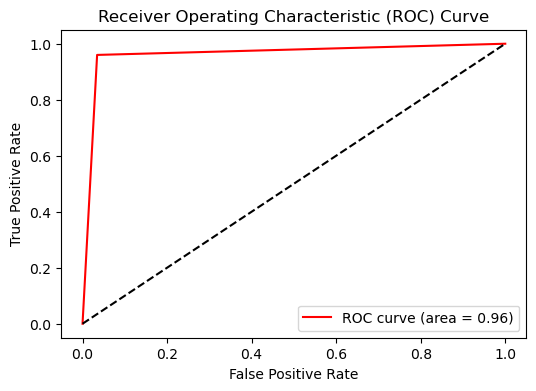

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators=45,criterion='entropy',random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=45, random_state=0)

In [47]:
y_pred4=rf_model.predict(x_test)
y_pred4

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [48]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [49]:
#for user input
x_user4=np.array([1,55,0,0,1,1,0,0,0,1,1,1,0,0,0])  #input is in encoded format

x_user4 = x_user4.reshape(1,-1)  #reshaping 1d array to 2d array
x_user4=sc.transform(x_user4)  #scaling the input

y_pred_user4=rf_model.predict(x_user4)
y_pred_user4

array([1])

In [50]:
cm=confusion_matrix(y_test,y_pred4)
cm

array([[29,  0],
       [ 1, 24]], dtype=int64)

In [51]:
print("Accuracy=",accuracy_score(y_test,y_pred4))
acc_rf=accuracy_score(y_test,y_pred4)

print("Precision=",precision_score(y_test,y_pred4))

print("Recall=",recall_score(y_test,y_pred4))

print("F1-Score=",f1_score(y_test,y_pred4))

acc.append(acc_rf)
model_name.append("RF")

Accuracy= 0.9814814814814815
Precision= 1.0
Recall= 0.96
F1-Score= 0.9795918367346939


In [52]:
acc,model_name

([0.9814814814814815,
  0.9629629629629629,
  0.9629629629629629,
  0.9814814814814815],
 ['KNN', 'NB', 'DT', 'RF'])

In [53]:
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.9958620689655173


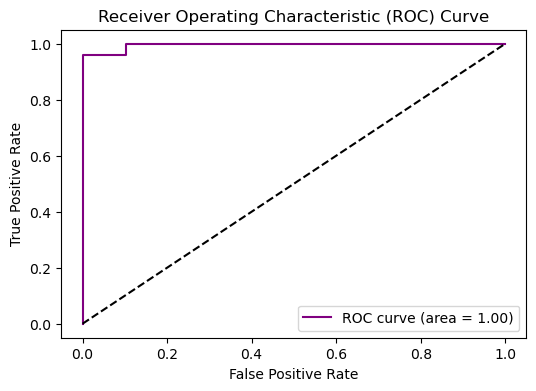

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()